<h3><i><b> PYTORCH - Training on MNIST Dataset </h3>
<h4> Session 6 </h4>


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x00000225BDA4DB40>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            transforms.Resize((28, 28)),
            transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms), **self.kwargs) 

    def test_loader(self):
        return torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms), **self.kwargs) 

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=256)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

In [6]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([256, 1, 28, 28])
Total images in the batch - 256


##### View sample images from the train loader  <hr>



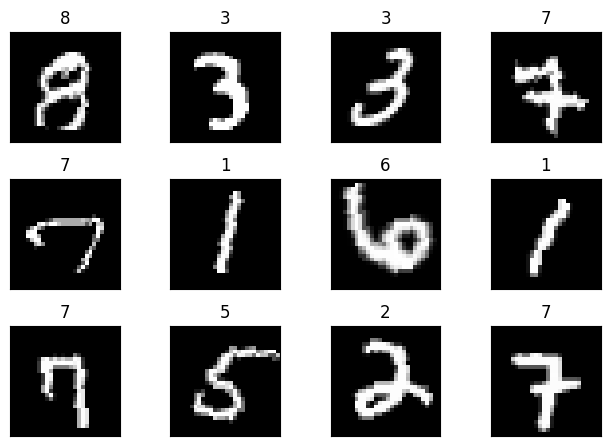

In [7]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [22]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,152
       BatchNorm2d-4           [-1, 16, 24, 24]              32
           Dropout-5           [-1, 16, 24, 24]               0
         MaxPool2d-6           [-1, 16, 12, 12]               0
            Conv2d-7            [-1, 8, 12, 12]             128
       BatchNorm2d-8            [-1, 8, 12, 12]              16
            Conv2d-9           [-1, 16, 10, 10]           1,152
      BatchNorm2d-10           [-1, 16, 10, 10]              32
          Dropout-11           [-1, 16, 10, 10]               0
        MaxPool2d-12             [-1, 16, 5, 5]               0
           Conv2d-13             [-1, 16, 5, 5]             256
      BatchNorm2d-14             [-1, 1

Model training

---


In [23]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 1


Train: Loss=0.2649 Batch_id=234 Accuracy=85.97: 100%|██████████| 235/235 [00:10<00:00, 22.09it/s]


Test set: Average loss: 0.1252, Accuracy: 9628/10000 (96.28%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 2


Train: Loss=0.0746 Batch_id=234 Accuracy=96.06: 100%|██████████| 235/235 [00:10<00:00, 22.81it/s]


Test set: Average loss: 0.0971, Accuracy: 9708/10000 (97.08%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 3


Train: Loss=0.0580 Batch_id=234 Accuracy=97.02: 100%|██████████| 235/235 [00:10<00:00, 23.15it/s]


Test set: Average loss: 0.0842, Accuracy: 9765/10000 (97.65%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 4


Train: Loss=0.0740 Batch_id=234 Accuracy=97.36: 100%|██████████| 235/235 [00:10<00:00, 22.82it/s]


Test set: Average loss: 0.0690, Accuracy: 9800/10000 (98.00%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 5


Train: Loss=0.1100 Batch_id=234 Accuracy=97.58: 100%|██████████| 235/235 [00:10<00:00, 23.17it/s]


Test set: Average loss: 0.0630, Accuracy: 9816/10000 (98.16%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 6


Train: Loss=0.1221 Batch_id=234 Accuracy=97.78: 100%|██████████| 235/235 [00:10<00:00, 22.83it/s]


Test set: Average loss: 0.0653, Accuracy: 9790/10000 (97.90%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 7


Train: Loss=0.0393 Batch_id=234 Accuracy=97.94: 100%|██████████| 235/235 [00:10<00:00, 22.83it/s]


Test set: Average loss: 0.0415, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 8


Train: Loss=0.0491 Batch_id=234 Accuracy=98.02: 100%|██████████| 235/235 [00:10<00:00, 22.60it/s]


Test set: Average loss: 0.0507, Accuracy: 9837/10000 (98.37%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 9


Train: Loss=0.0648 Batch_id=234 Accuracy=98.03: 100%|██████████| 235/235 [00:10<00:00, 22.88it/s]


Test set: Average loss: 0.0451, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 4.0000e-02.
Epoch 10


Train: Loss=0.0151 Batch_id=234 Accuracy=98.14: 100%|██████████| 235/235 [00:10<00:00, 22.79it/s]


Test set: Average loss: 0.0349, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 11


Train: Loss=0.0476 Batch_id=234 Accuracy=98.32: 100%|██████████| 235/235 [00:10<00:00, 22.50it/s]


Test set: Average loss: 0.0359, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 12


Train: Loss=0.0765 Batch_id=234 Accuracy=98.44: 100%|██████████| 235/235 [00:10<00:00, 22.47it/s]


Test set: Average loss: 0.0360, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 13


Train: Loss=0.1470 Batch_id=234 Accuracy=98.44: 100%|██████████| 235/235 [00:10<00:00, 22.60it/s]


Test set: Average loss: 0.0359, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 14


Train: Loss=0.0277 Batch_id=234 Accuracy=98.42: 100%|██████████| 235/235 [00:10<00:00, 22.70it/s]


Test set: Average loss: 0.0347, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 4.0000e-03.
Epoch 15


Train: Loss=0.1053 Batch_id=234 Accuracy=98.49: 100%|██████████| 235/235 [00:10<00:00, 22.50it/s]


Test set: Average loss: 0.0346, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 4.0000e-03.


In [10]:
# from ignite.engine import create_supervised_trainer, create_supervised_evaluator
# from ignite.metrics import Accuracy, Loss
# from ignite.handlers import FastaiLRFinder

# trainer = create_supervised_trainer(model, optimizer, criterion, device=device)

# trainer.run(train_loader, max_epochs=3)

Plot the Loss/Accuracy for Train/Test dataset

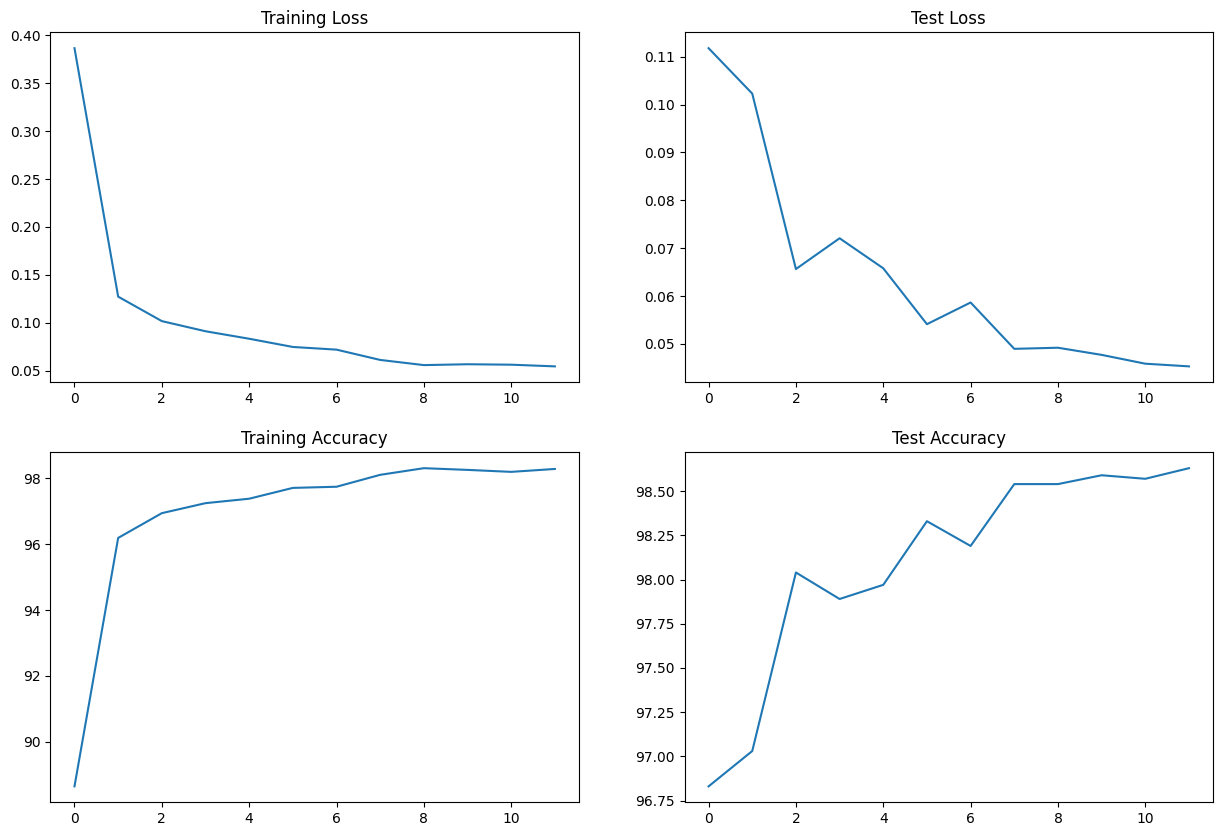

In [11]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()